## **IMAGE AUTOENCODER USING CONVOLUTION NEURAL NETWORK ON MNIST DATASET**

In [ ]:
import tensorflow as tf
%load_ext tensorboard
from keras.callbacks import TensorBoard
import keras
from keras import layers
from datetime import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


## **LOAD DATASET**

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
# divide x_test into validation and test
X_val = X_test[:7000]
X_test = X_test[7000:]

In [ ]:
print("validation data: {0} \ntest data: {1}".format(X_val.shape, X_test.shape))

validation data: (7000, 28, 28, 1) 
test data: (3000, 28, 28, 1)


## **DEFINE CNN MODEL**

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

In [ ]:
X = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
X = layers.MaxPooling2D((2, 2), padding='same')(X)
X = layers.Dropout(0.25)(X)
X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(X)
X = layers.MaxPooling2D((2, 2), padding='same')(X)
X = layers.Dropout(0.25)(X)
X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(X)
encoded = layers.MaxPooling2D((2, 2), padding='same')(X)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
X = layers.UpSampling2D((2, 2))(X)
X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(X)
X = layers.UpSampling2D((2, 2))(X)
X = layers.Conv2D(16, (3, 3), activation='relu')(X)
X = layers.UpSampling2D((2, 2))(X)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(X)

In [ ]:
m_autoencoder = keras.Model(input_img, decoded)
m_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

In [ ]:
# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')



In [ ]:
m_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 8)           0     

## **TRAIN MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint   
import time
# train our model and save the best results in the file: MLP.best_weights
# additionally count the time how long it took

ccn_start = time.time() # for stopwatch

history = m_autoencoder.fit(X_train, X_train,
                epochs=5,
                batch_size=512,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[tboard_callback])

ccn_end = time.time()
ccn_took = ccn_end -ccn_start


Epoch 1/5
118/118 [==============================] - 75s 627ms/step - loss: 0.4714 - accuracy: 0.7655 - mse: 0.1325 - val_loss: 0.2311 - val_accuracy: 0.7789 - val_mse: 0.0578
Epoch 2/5
118/118 [==============================] - 74s 626ms/step - loss: 0.2134 - accuracy: 0.7839 - mse: 0.0522 - val_loss: 0.1819 - val_accuracy: 0.7819 - val_mse: 0.0407
Epoch 3/5
118/118 [==============================] - 72s 612ms/step - loss: 0.1824 - accuracy: 0.7930 - mse: 0.0415 - val_loss: 0.1623 - val_accuracy: 0.7871 - val_mse: 0.0337
Epoch 4/5
118/118 [==============================] - 73s 620ms/step - loss: 0.1682 - accuracy: 0.7973 - mse: 0.0363 - val_loss: 0.1507 - val_accuracy: 0.7911 - val_mse: 0.0296
Epoch 5/5
118/118 [==============================] - 79s 666ms/step - loss: 0.1592 - accuracy: 0.7994 - mse: 0.0330 - val_loss: 0.1424 - val_accuracy: 0.7925 - val_mse: 0.0267


In [ ]:
print("took %s seconds"%(ccn_took))

took 373.1634273529053 seconds


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

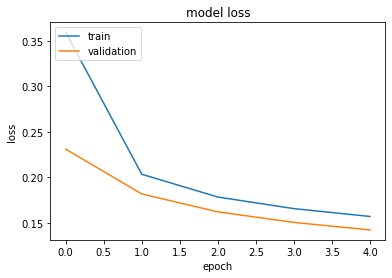

In [ ]:
plotLosses(history)

In [ ]:
score = m_autoencoder.evaluate(X_test, X_test, batch_size=512, verbose=2)

6/6 - 1s - loss: 0.1424 - accuracy: 0.7925 - mse: 0.0267


##**IMAGE RECONSTRUCTION**

In [ ]:
print(m_autoencoder.metrics_names)
print(score)

['loss', 'accuracy', 'mse']
[0.14244045317173004, 0.7924723625183105, 0.026664815843105316]


In [ ]:
ccn_start = time.time() # for stopwatch

decoded_imgs = m_autoencoder.predict(X_test)

ccn_end = time.time()
ccn_took = ccn_end -ccn_start
print("took %s seconds"%(ccn_took))

took 1.5227556228637695 seconds


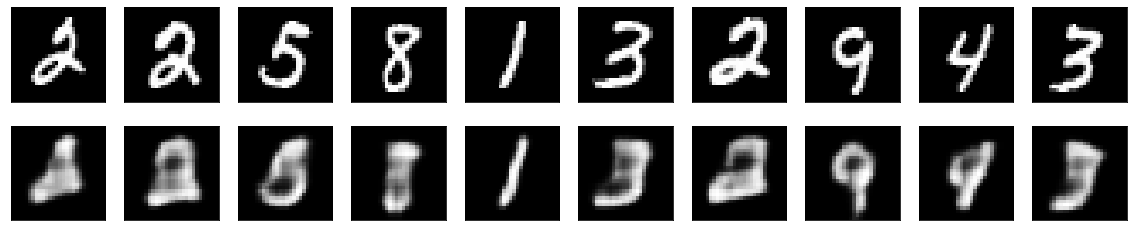

In [ ]:


n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##**MEAN SQUARE ERROR**

In [ ]:
from sklearn.metrics import mean_squared_error

X_test = X_test.reshape(3000,784)
decoded_imgs = decoded_imgs.reshape(3000,784)

MSE = mean_squared_error(X_test, decoded_imgs)
MSE

0.026664805